# Comprehensive Analysis of our Adahybrid strategy


In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

## 1. [Prelim] Comparison between 90%+10% hybrid strategies and Adahybrid (Take a chance model vs Our model)
    - xgb(90%)+random(10%)
    - DATE(90%)+bATE(10%)
    - Ada DATE+bATE
    - Ada xgb+random

In [129]:
results = glob.glob('../results/performances/ada-prelim-result-*')   # quick- or www21- or fld-
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

### Collecting Result Files: Results of Individual Experiments

In [130]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-precision'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=14).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

6


In [131]:
full_results.keys()

dict_keys(['real-t,adahybrid,xgb/random', 'real-t,hybrid,xgb/random', 'real-m,adahybrid,xgb/random', 'real-m,hybrid,xgb/random', 'real-t,hybrid,DATE/bATE', 'real-t,adahybrid,DATE/bATE'])

### Mdata Simulation Results - Hybrid

In [132]:
full_results.keys()

dict_keys(['real-t,adahybrid,xgb/random', 'real-t,hybrid,xgb/random', 'real-m,adahybrid,xgb/random', 'real-m,hybrid,xgb/random', 'real-t,hybrid,DATE/bATE', 'real-t,adahybrid,DATE/bATE'])

The number of trials for each setting (Results are averaged):
real-m,adahybrid,xgb/random 1 0.9987
real-m,hybrid,xgb/random 1 0.9947


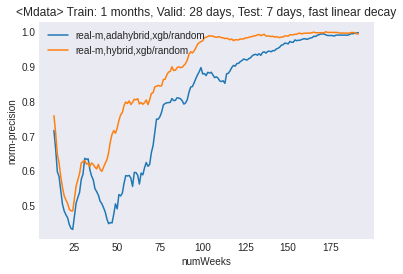

In [133]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

### Tdata Simulation Results - Hybrid

The number of trials for each setting (Results are averaged):
real-t,adahybrid,xgb/random 1 0.1814
real-t,hybrid,xgb/random 1 0.338
real-t,hybrid,DATE/bATE 1 nan
real-t,adahybrid,DATE/bATE 1 nan


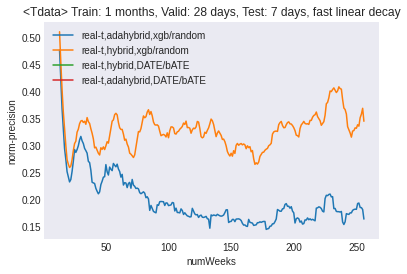

In [134]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numWeeks')

plt.show()
plt.close()

## 2. [Ada] Comparison between Hybrid Strategies (by changing Exploration part) and Adahybrid

In [135]:
cresults = glob.glob('../results/performances/ada-result-*')   # quick- or www21- or fld-
clist1, clist2 = zip(*sorted(zip([os.stat(result).st_size for result in cresults], cresults)))

In [136]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in clist1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(clist2[-i])
        var = 'norm-precision'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=14).mean()
        filename = clist2[-i][clist2[-i].index('16'):clist2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'sampling', 'subsamplings', 'current_weights']].iloc[0]))
        full_results[info].append(rolling_mean14)
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', clist2[-i])
        continue
print(count)
#     plt.close()

36


The number of trials for each setting (Results are averaged):
real-m,adahybrid,xgb/random,0.9/0.1 1 0.9955
real-m,hybrid,xgb/random,0.0/1.0 1 0.1401
real-m,hybrid,xgb/random,0.1/0.9 1 0.6786
real-m,hybrid,xgb/random,0.2/0.8 1 0.841
real-m,hybrid,xgb/random,0.3/0.7 1 0.9843
real-m,hybrid,xgb/random,0.4/0.6 1 0.9964
real-m,hybrid,xgb/random,0.5/0.5 1 0.9987
real-m,hybrid,xgb/random,0.6/0.4 1 0.9987
real-m,hybrid,xgb/random,0.7/0.3 1 0.9955
real-m,hybrid,xgb/random,0.8/0.2 1 0.9955
real-m,hybrid,xgb/random,0.9/0.1 1 0.9987
real-m,hybrid,xgb/random,1.0/0.0 1 0.9947


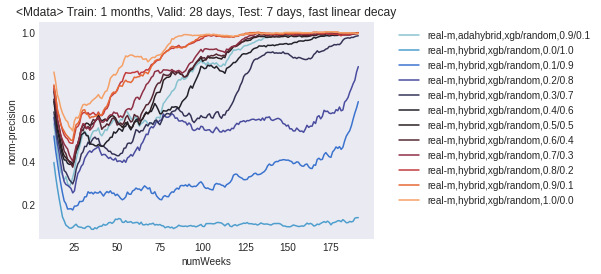

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 12)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-m' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):
real-t,adahybrid,xgb/random,0.9/0.1 1 0.2611
real-t,hybrid,xgb/random,0.0/1.0 1 0.1068
real-t,hybrid,xgb/random,0.1/0.9 1 0.1758
real-t,hybrid,xgb/random,0.2/0.8 1 0.2352
real-t,hybrid,xgb/random,0.3/0.7 1 0.2723
real-t,hybrid,xgb/random,0.4/0.6 1 0.2999
real-t,hybrid,xgb/random,0.5/0.5 1 0.3231
real-t,hybrid,xgb/random,0.6/0.4 1 0.3356
real-t,hybrid,xgb/random,0.7/0.3 1 0.3505
real-t,hybrid,xgb/random,0.8/0.2 1 0.3764
real-t,hybrid,xgb/random,0.9/0.1 1 0.3486
real-t,hybrid,xgb/random,1.0/0.0 1 0.1216


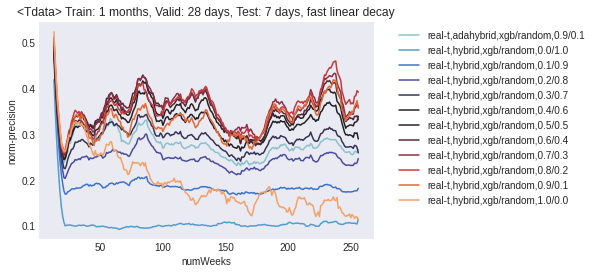

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 12)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-t' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

The number of trials for each setting (Results are averaged):
real-c,adahybrid,xgb/random,0.9/0.1 1 0.1973
real-c,hybrid,xgb/random,0.0/1.0 1 0.1092
real-c,hybrid,xgb/random,0.1/0.9 1 0.1545
real-c,hybrid,xgb/random,0.2/0.8 1 0.1667
real-c,hybrid,xgb/random,0.3/0.7 1 0.1704
real-c,hybrid,xgb/random,0.4/0.6 1 0.1365
real-c,hybrid,xgb/random,0.5/0.5 1 0.1579
real-c,hybrid,xgb/random,0.6/0.4 1 0.1685
real-c,hybrid,xgb/random,0.7/0.3 1 0.2838
real-c,hybrid,xgb/random,0.8/0.2 1 0.3102
real-c,hybrid,xgb/random,0.9/0.1 1 0.2957
real-c,hybrid,xgb/random,1.0/0.0 1 0.2948


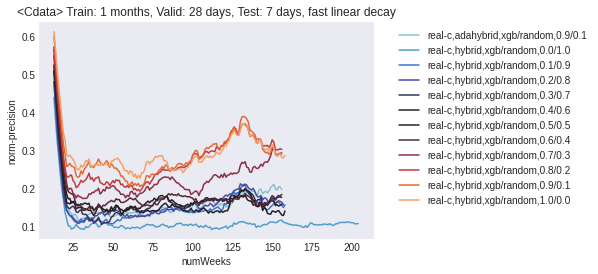

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 12)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-c' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Cdata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

No handles with labels found to put in legend.


The number of trials for each setting (Results are averaged):


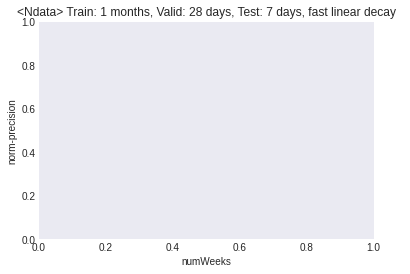

In [140]:
fig = plt.figure()
ax = fig.add_subplot(111)
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))
plt.style.use('seaborn-dark')
colors = sns.color_palette("icefire", 12)
ax.set_prop_cycle('color', colors)

result_one_dataset = sorted([key for key in full_results.keys() if 'real-n' in key])
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
#     print(pd.concat([*full_results[key]], axis=1))   # Check current running status: debug purpose
    print(key, len(full_results[key]), round(np.mean(avg_result[-13:]), 4))
    ax.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Ndata> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.ylabel(var)
plt.xlabel('numWeeks')
# plt.ylim(0.4, 0.6)
plt.show()
plt.close()

## 3. Weights distribution visualization

In [141]:
exp_prefix = 'ada-prelim'

In [142]:
wresults = glob.glob(f'../results/ada_ratios/{exp_prefix}-result-*')   # quick- or www21- or fld-
wlist1, wlist2 = zip(*sorted(zip([os.stat(result).st_size for result in wresults], wresults)))

In [143]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)
weights = defaultdict(dict)
# Retrieving results
num_logs = len([i for i in wlist1 if i > 1000])
count= 0
file_no = 0
for i in range(1,num_logs+1):
    try:
        cols = [f'{i/20} explore rate' for i in range(20)]
        df = pd.read_csv(wlist2[-i])
        filename = wlist2[-i][wlist2[-i].index('16'):wlist2[-i].index('16')+10]
        dataname = df['data'].iloc[0]
        full_results[(filename, dataname)] = df[cols].transpose()
        weights[(filename, dataname)] = df['chosen_rate']
        count += 1
        
# Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', wlist2[-i])
        continue
print(count)
#     plt.close()

4


In [144]:
full_results.keys()

dict_keys([('1627116937', 'real-t'), ('1627116917', 'real-m'), ('1627193731', 'real-t'), ('1627193711', 'real-m')])

In [145]:
keys = list(full_results.keys())
keys

[('1627116937', 'real-t'),
 ('1627116917', 'real-m'),
 ('1627193731', 'real-t'),
 ('1627193711', 'real-m')]

No handles with labels found to put in legend.


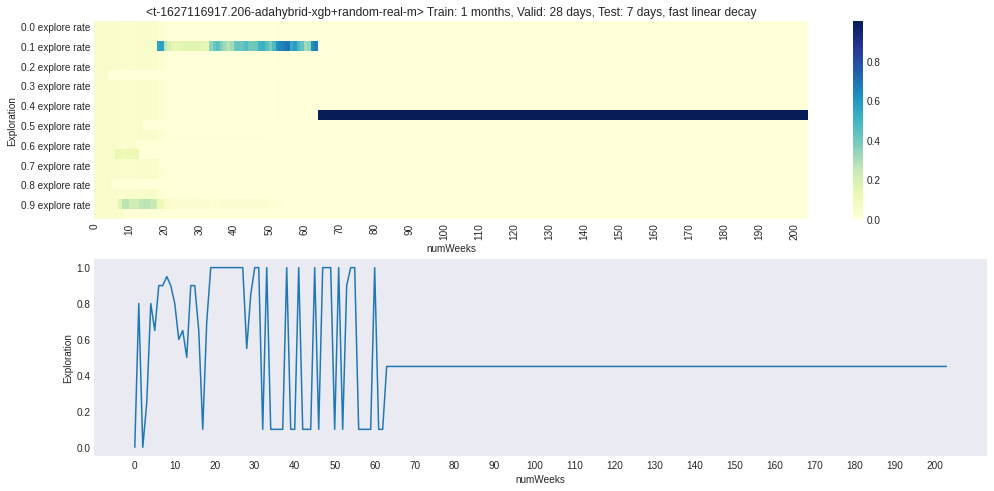

In [146]:
ind = 1
runid = keys[ind][0]
data = keys[ind][1]
wresults = glob.glob(f'../results/ada_ratios/{exp_prefix}-result-{runid}*')[0]  # quick- or www21- or fld-
fig = plt.figure(figsize=(16,8))

n = full_results[(runid, data)].shape[1]
ax = fig.add_subplot(211)
ax = sns.heatmap(full_results[(runid, data)], linewidth=0, cmap = 'YlGnBu')

ax.set_title(f'<{wresults[38:-9]}-{data}> Train: 1 months, Valid: 28 days, Test: 7 days, fast linear decay')
ax.legend(loc='upper left')
ax.set_ylabel('Exploration')
ax.set_xlabel('numWeeks')
ax.set_xticks(np.arange(0, n, 10))
ax.set_xticklabels(np.arange(0, n, 10))

ax2 = fig.add_subplot(212)
ax2.plot(weights[(runid, data)])
ax2.set_ylabel('Exploration')
ax2.set_xlabel('numWeeks')
ax2.set_xticks(np.arange(0, n, 10))
ax2.set_xticklabels(np.arange(0, n, 10))

plt.show()
plt.close()